In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTRODUCTION TO TEXT MINING PART2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 3: Directory settings  ####
from pathlib import Path
import os
# Set `home_dir` to the root directory of your computer. 
home_dir = Path.home()

# Set `main_dir` to the location of your `booz-allen-hamilton` folder.
main_dir = home_dir / "Documents" / "NLP_Intro" / "intro-to-text-mining-main"
# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"



In [2]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)

# Check working directory.
print(os.getcwd())

/Users/amirmokhtari/Documents/NLP_Intro/intro-to-text-mining-main/data


In [3]:
#=================================================-
#### Slide 5: Loading packages  ####

# Helper packages.
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Packages with tools for text processing.
import nltk
from wordcloud import WordCloud

# Packages for working with text data.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Packages for getting data ready for and building a LDA model.
import gensim
from gensim import corpora, models
from pprint import pprint



In [4]:
#=================================================-
#### Slide 7: Load objects   ####

processed_docs = pickle.load(open("NYT_clean.sav","rb"))       #<- the processed NYT snippets
NYT_clean_list = pickle.load(open("NYT_clean_list.sav","rb"))  #<- the processed NYT snippets
corpus_freq_dist = pickle.load(open("corpus_freq_dist.sav","rb"))  #<- the processed NYT snippets



In [20]:
pd.Series(nltk.ngrams((' '.join(NYT_clean_list).split()),3)).value_counts()


(presid, donald, trump)        13
(partial, govern, shutdown)     3
(pay, million, bluefin)         2
(like, star, born)              2
(today, disjoint, world)        2
                               ..
(make, feder, juri)             1
(goal, turkish, troop)          1
(bolsonaro, sworn, brazil)      1
(nearli, two, decad)            1
(accord, trader, refinitiv)     1
Length: 3822, dtype: int64

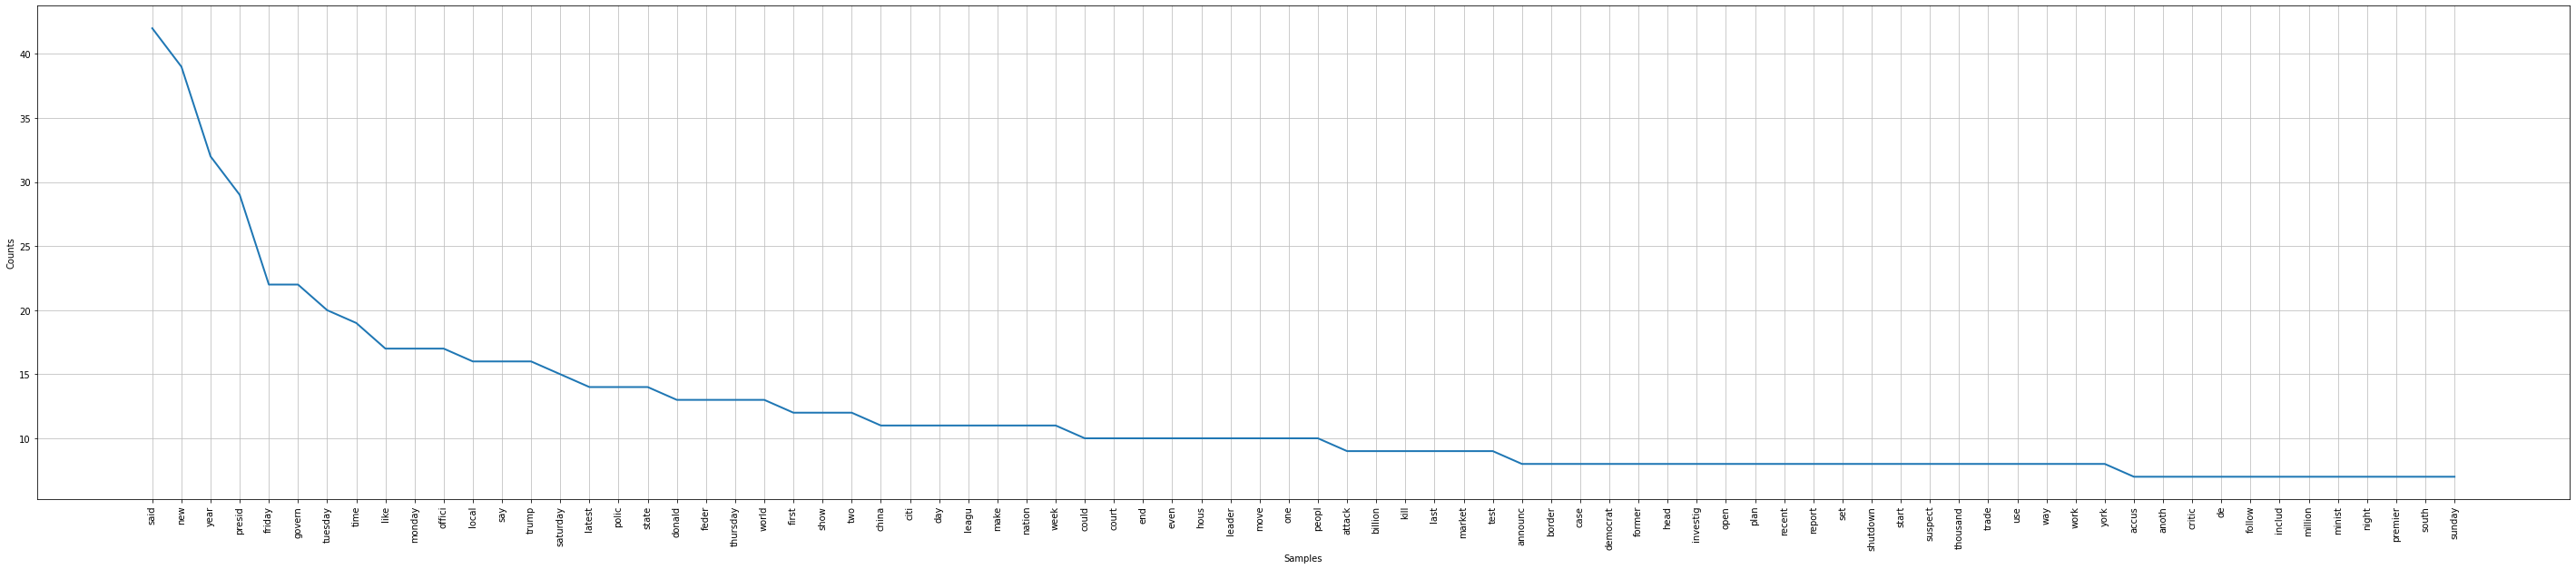

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
#=================================================-
#### Slide 8: Plot distribution of words in snippet corpus  ####

# Save as a FreqDist object native to nltk.
corpus_freq_dist = nltk.FreqDist(corpus_freq_dist)

# Plot distribution for the entire corpus.
plt.figure(figsize = (50, 10))
corpus_freq_dist.plot(80)

# note: you will ALWAYS get the same shape for any corpus written by a human (e.g., a few set of words that are extremely frequent and others that are less)

In [10]:
corpus_freq_dist

FreqDist({'said': 42, 'new': 39, 'year': 32, 'presid': 29, 'friday': 22, 'govern': 22, 'tuesday': 20, 'time': 19, 'like': 17, 'monday': 17, ...})

In [28]:
wordcloud

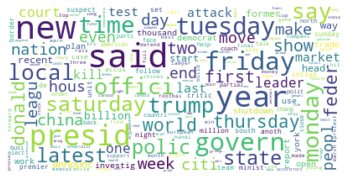

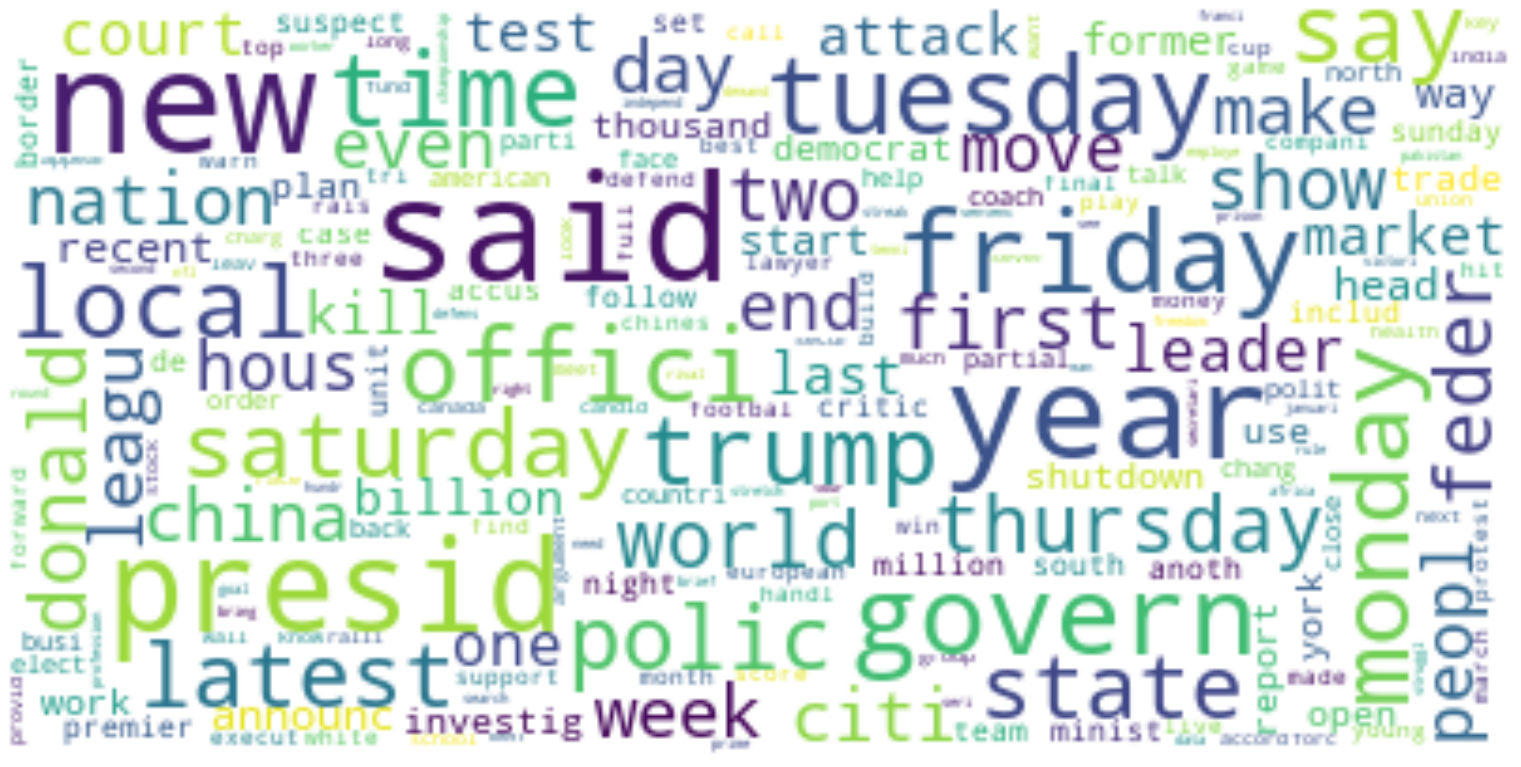

In [27]:
#=================================================-
#### Slide 9: Visualizing word counts with word clouds  ####

# Construct a word cloud from corpus.
wordcloud = WordCloud(max_font_size = 40,
                      background_color = "white",
                      collocations = False) # if true, we will look into n-grams

wordcloud = wordcloud.generate(' '.join(NYT_clean_list))

# Plot the cloud using matplotlib.
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

# Plot the cloud using matplotlib.
plt.figure(figsize = (27, 20))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()



In [30]:
NYT_clean_list[0].split()

['pakistan',
 'struggl',
 'batsmen',
 'must',
 'find',
 'way',
 'handl',
 'south',
 'africa',
 'potent',
 'pace',
 'attack',
 'claw',
 'way',
 'back',
 'seri',
 'second',
 'test',
 'start',
 'like',
 'live',
 'newland',
 'wicket',
 'thursday']

In [31]:
#=================================================-
#### Slide 12: Display n-grams in a dataset  ####

def sentence_convert_to_word(lst):
    return ' '.join(lst).split()

words = sentence_convert_to_word(NYT_clean_list)

# Display the frequency of counts of the bigrams
(pd.Series(nltk.ngrams(words, 2) # <- set the value to 2 for bigram
          ).value_counts())[:10] # <- display the top 10 bigrams



(donald, trump)       13
(presid, donald)      13
(time, local)          9
(new, york)            8
(said, monday)         7
(premier, leagu)       6
(new, year)            6
(said, friday)         5
(white, hous)          5
(govern, shutdown)     5
dtype: int64

In [8]:
#=================================================-
#### Slide 13: Display n-grams in a dataset (cont'd)  ####

bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10].sort_values()
trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10].sort_values()



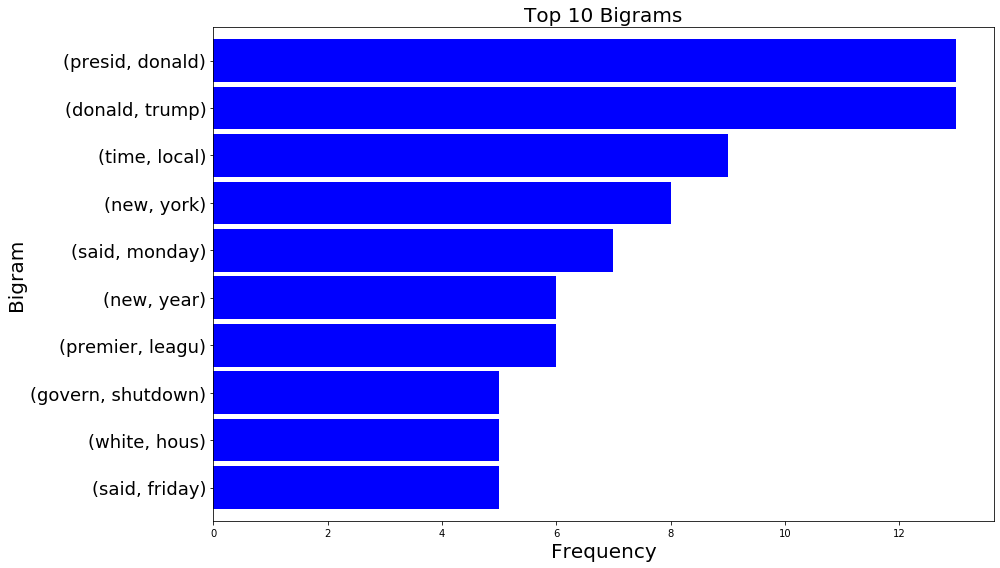

In [9]:
#=================================================-
#### Slide 14: Visualizing n-grams using bar chart  ####

bigrams.plot.barh(color='blue', width=.9, figsize=(14, 8))
plt.yticks(fontsize = 18)                                
plt.title('Top 10 Bigrams', fontsize = 20)
plt.ylabel('Bigram', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.tight_layout() #<- adjusts plot layout
plt.show()



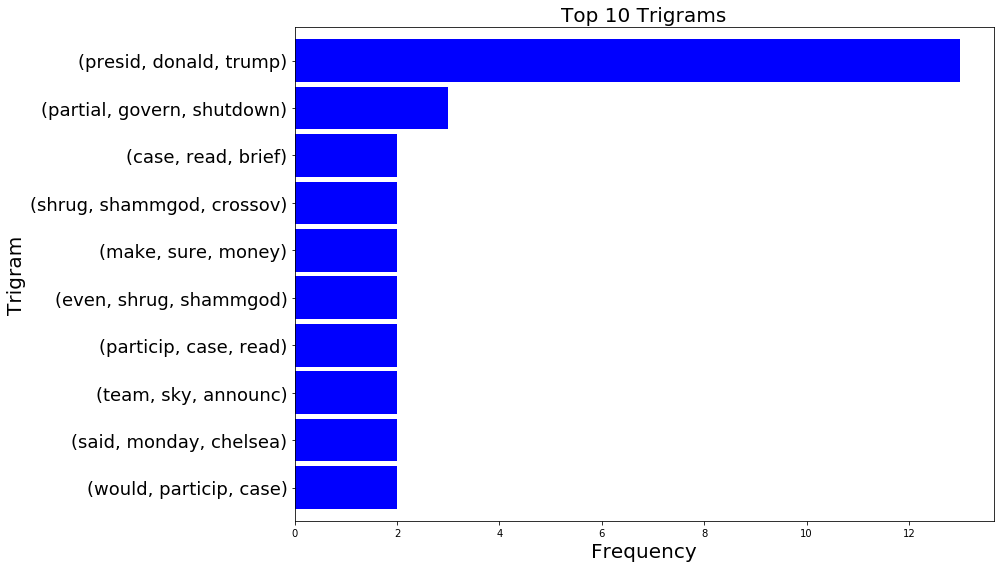

In [10]:
trigrams.plot.barh(color='blue', 
                   width=.9, figsize=(14, 8))
plt.yticks(fontsize = 18)                                
plt.title('Top 10 Trigrams', fontsize = 20)
plt.ylabel('Trigram', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.tight_layout() #<- adjusts plot layout
plt.show()



In [11]:
#=================================================-
#### Slide 21: Exercise 1  ####





In [41]:
processed_docs

[['pakistan',
  'struggl',
  'batsmen',
  'must',
  'find',
  'way',
  'handl',
  'south',
  'africa',
  'potent',
  'pace',
  'attack',
  'claw',
  'way',
  'back',
  'seri',
  'second',
  'test',
  'start',
  'like',
  'live',
  'newland',
  'wicket',
  'thursday'],
 ['nation',
  'footbal',
  'leagu',
  'microscop',
  'lack',
  'minor',
  'head',
  'coach',
  'recent',
  'slew',
  'fire',
  'leagu'],
 ['hit',
  'hot',
  'streak',
  'right',
  'time',
  'goal',
  'golf',
  'top',
  'male',
  'profession',
  'year',
  'new',
  'calendar',
  'cram',
  'major',
  'championship',
  'super',
  'busi',
  'stretch'],
 ['pope',
  'franci',
  'usher',
  'new',
  'year',
  'ode',
  'motherhood',
  'tuesday',
  'remind',
  'faith',
  'mother',
  'exampl',
  'embrac',
  'best',
  'antidot',
  'today',
  'disjoint',
  'world',
  'solitud',
  'miseri'],
 ['chri',
  'froom',
  'defend',
  'giro',
  'titl',
  'year',
  'choos',
  'focu',
  'win',
  'fifth',
  'tour',
  'de',
  'franc',
  'crown',
  '

In [12]:
#=================================================-
#### Slide 45: Create a dictionary of counts   ####

# Set the seed.
np.random.seed(1)

dictionary = gensim.corpora.Dictionary(processed_docs)

# The loop below iterates through the first 10 items of the dictionary and prints out the key and value.
count = 0

for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break



0 africa
1 attack
2 back
3 batsmen
4 claw
5 find
6 handl
7 like
8 live
9 must
10 newland


In [42]:
dictionary

In [13]:
#=================================================-
#### Slide 46: Create a dictionary of counts   ####

dictionary.filter_extremes(no_below = 5, no_above = 0.5, keep_n = 248)

# How many words did are left in the dictionary?
len(dictionary)



155

In [14]:
#=================================================-
#### Slide 47: Document to bag-of-words  ####

# We use a list comprehension to transform each doc within our processed_docs object.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Let's look at the first document.
print(bow_corpus[0])



[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)]


In [43]:
#=================================================-
#### Slide 48: Document to bag-of-words  ####

# Isolate the first document.
bow_doc_1 = bow_corpus[0]

# Iterate through each dictionary item using the index.
# Print out each actual word and how many times it appears.
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0],
                                                     dictionary[bow_doc_1[i][0]],
                                                     bow_doc_1[i][1]))



Word 0 ("attack") appears 1 time.
Word 1 ("back") appears 1 time.
Word 2 ("find") appears 1 time.
Word 3 ("handl") appears 1 time.
Word 4 ("like") appears 1 time.
Word 5 ("south") appears 1 time.
Word 6 ("start") appears 1 time.
Word 7 ("test") appears 1 time.
Word 8 ("thursday") appears 1 time.
Word 9 ("way") appears 2 time.


In [ ]:
#=================================================-
#### Slide 53: Exercise 2  ####





In [ ]:
#=================================================-
#### Slide 55: Save results as a pickle  ####

pickle.dump(bow_corpus, open('bow_corpus.sav', 'wb')) 
pickle.dump(corpus_tfidf, open('corpus_tfidf.sav', 'wb')) 
pickle.dump(dictionary, open('dictionary.sav', 'wb'))